In [1]:
from __future__ import print_function
import os
import pandas as pd
import numpy as np
from statsmodels.tsa import stattools
from statsmodels.tsa import seasonal
%matplotlib inline
from matplotlib import pyplot as plt

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
os.chdir('E:/Practical Time Series')

In [3]:
wisc_emp = pd.read_csv('datasets/wisconsin-employment-time-series.csv')
wisc_emp.index = wisc_emp['Month']

In [4]:
print('Shape of the DataFrame:', wisc_emp.shape)

Shape of the DataFrame: (178, 2)


In [5]:
wisc_emp.head(10)

,Month,Employment
Month,,
1961-01,1961-01,239.6
1961-02,1961-02,236.4
1961-03,1961-03,236.8
1961-04,1961-04,241.5
1961-05,1961-05,243.7
1961-06,1961-06,246.1
1961-07,1961-07,244.1
1961-08,1961-08,244.2
1961-09,1961-09,244.8


In [6]:
missing = (pd.isnull(wisc_emp['Employment'])) | (pd.isnull(wisc_emp['Month']))
print('Number of missing values found:', missing.sum())
wisc_emp = wisc_emp.loc[~missing, :]

Number of missing values found: 0


In [7]:
adf_result = stattools.adfuller(wisc_emp['Employment'], autolag='AIC')

In [8]:
print('p-val of the ADF test on irregular variations in employment data:', adf_result[1])

p-val of the ADF test on irregular variations in employment data: 0.981000018954


In [9]:
decompose_model = seasonal.seasonal_decompose(wisc_emp.Employment.tolist(), freq=12, model='additive')

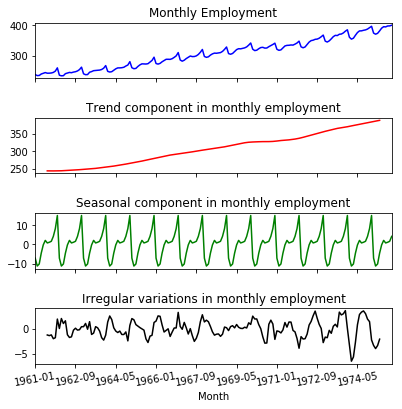

In [12]:
fig, axarr = plt.subplots(4, sharex=True)
fig.set_size_inches(5.5, 5.5)

wisc_emp['Employment'].plot(ax=axarr[0], color='b', linestyle='-')
axarr[0].set_title('Monthly Employment')

pd.Series(data=decompose_model.trend, index=wisc_emp.index).plot(color='r', linestyle='-', ax=axarr[1])
axarr[1].set_title('Trend component in monthly employment')

pd.Series(data=decompose_model.seasonal, index=wisc_emp.index).plot(color='g', linestyle='-', ax=axarr[2]) 
axarr[2].set_title('Seasonal component in monthly employment')

pd.Series(data=decompose_model.resid, index=wisc_emp.index).plot(color='k', linestyle='-', ax=axarr[3])
axarr[3].set_title('Irregular variations in monthly employment')

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=2.0)
plt.xticks(rotation=10)

plt.savefig('plots/Section 2/_02_21.png', format='png', dpi=300)

In [13]:
adf_result = stattools.adfuller(decompose_model.resid[np.where(np.isfinite(decompose_model.resid))[0]], autolag='AIC') 

In [14]:
print('p-val of the ADF test on irregular variations in employment data:', adf_result[1])

p-val of the ADF test on irregular variations in employment data: 0.00656093163464


In [15]:
decompose_model = seasonal.seasonal_decompose(wisc_emp.Employment.tolist(), freq=12, model='multiplicative') 

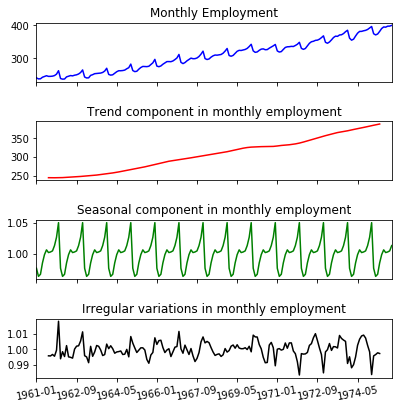

In [19]:
fig, axarr = plt.subplots(4, sharex=True)
fig.set_size_inches(5.5, 5.5)

wisc_emp['Employment'].plot(ax=axarr[0], color='b', linestyle='-')
axarr[0].set_title('Monthly Employment')

axarr[1].plot(decompose_model.trend, color='r', linestyle='-')
axarr[1].set_title('Trend component in monthly employment')

axarr[2].plot(decompose_model.seasonal, color='g', linestyle='-')
axarr[2].set_title('Seasonal component in monthly employment')

axarr[3].plot(decompose_model.resid, color='k', linestyle='-')
axarr[3].set_title('Irregular variations in monthly employment')

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=2.0)
plt.xticks(rotation=10)

plt.savefig('plots/Section 2_02_22.png', format='png', dpi=300)

In [20]:
adf_result = stattools.adfuller(decompose_model.resid[np.where(np.isfinite(decompose_model.resid))[0]], autolag='AIC') 

In [21]:
print('p-val of the ADF test on irregular variations in employment data:', adf_result[1])

p-val of the ADF test on irregular variations in employment data: 0.00123478372677
